<a href="https://colab.research.google.com/github/engineerjkk/DeepLearning/blob/main/ShallowNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1/ (1+ np.exp(-x))

In [ ]:
def softmax(x):
    e_x=np.exp(x)
    return e_x/np.num(e_x)

##네트워크 구조를 정의한다. input 레이어와 히든과 아웃풋의 레이어의 개수이다.
  #히든레이어의 weight를 곱해주고 bias를 더해준다.

In [ ]:
# Define network architecture
class ShallowNN:
    def __init__(self, num_input,num_hidden,num_output):
        self.w_h=np.zeros((num_hidden,num_input),dtype=np.float32)
        self.b_h=np.zeros((num_hidden,),dtype=np.float32)
        self.w_o=np.zeros((num_output,num_hidden),dtype=np.float32)
        self.b_o=np.zeros((num_output,),dtype=np.float32)
        
    def __call__(self,x):
        h=sigmoid(np.matmul(self.w_h,x)+self.b_h)
        return softmax(np.matmul(self.w_o,h)+self.b_o)
    #soft
        

In [ ]:
# Import and organize dataset
dataset = np.load('ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

In [ ]:
# Create Model
model = ShallowNN(2,128,10)


In [ ]:
weights = np.load('ch2_parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

## 모델 구동 및 결과 프린트

In [ ]:
outputs=list()
for pt, label in zip(inputs, labels): #input은 pt로, labels는 label로 들어간다.
    output=model(pt)
    outputs.append(np.argmax(output))
    print(np.argmax(output),label)#출력으로 몇번레이블로 출력했는지와, 실제 정답레이블을 프린트한다.
outputs=np.stack(outputs,axis=0)#전부다 numpy object로 바뀌게된다.


AttributeError: ignored

## 0,1 idx variable를 idx에 해당하는 것을 그린다. 0이 정답인거 뿌리고 1이정답인거 뿌린다. 스케터가 한번돌때마다 새로운 색깔로 뿌려주기때문에 색깔이 모두 다르다. 

##아래가 X0축, 세로가 X1축이다. 하나 샘플들이 분포가고있다. 이렇게 겹쳐있는부분이 decision boundry가 있을때 헷갈리는 부분이다.


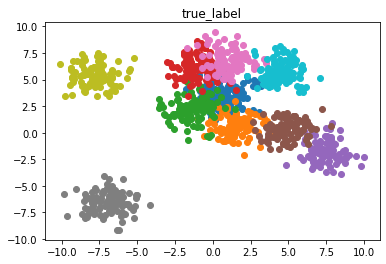

In [ ]:
plt.figure()
for idx in range(10):
  mask=labels==idx
  plt.scatter(inputs[mask,0],inputs[mask,1])
plt.title('true_label')
plt.show()

## 추정된 모델을 클래스 스케터 플랏을 그려보자. 

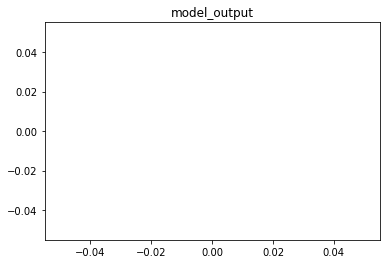

In [ ]:
plt.figure()
for idx in range(10):
  mask=outputs==idx
  plt.scatter(inputs[mask,0],inputs[mask,1])
plt.title('model_output')
plt.show()